<a href="https://colab.research.google.com/github/moizshaik730-sys/Dataset-1/blob/main/CODE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Data Loaded Successfully!
Shape: (10000, 4)
Columns: ['flags', 'utterance', 'category', 'intent']
    flags                                        utterance category  \
0     BLQ          help me modifying the last order i made    ORDER   
1    BILP   could you help me to change a purchase I made?    ORDER   
2     BLQ                  help changing a purchase i made    ORDER   
3     BLQ          need help updating an order I have made    ORDER   
4  BILMPQ  could ya help me to swap some items of an order    ORDER   

         intent  
0  change_order  
1  change_order  
2  change_order  
3  change_order  
4  change_order  

📊 Class distribution after combining:
intent
change_order    10000
other           10000
Name: count, dtype: int64

✅ Accuracy: 0.9992
Classification Report:
               precision    recall  f1-score   support

change_order       1.00      1.00      1.00      2000
       other       1.00      1.00      1.00      2000

    accuracy                           1.

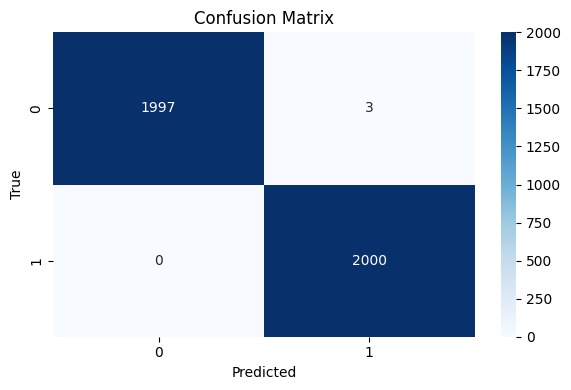

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================
# 1️⃣ Load Dataset
# ==============================
df = pd.read_excel("/content/Dataset - 1.xlsx")

print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# ==============================
# 2️⃣ Create Binary Dataset
# ==============================
text_col = 'utterance'
label_col = 'intent'

# Keep only the real utterances
df = df.dropna(subset=[text_col])

# Create fake "other" utterances (for demo only)
fake_texts = [
    "What's the weather today?",
    "Book a flight for me.",
    "Tell me a joke.",
    "Play some music.",
    "Set a reminder for 5 PM.",
    "Turn on the lights.",
    "What's your name?",
    "Translate hello to Spanish.",
    "How are you?",
    "Open Google."
] * 1000  # make ~10k samples

# Combine both
df_fake = pd.DataFrame({text_col: fake_texts[:len(df)], label_col: "other"})
df_combined = pd.concat([df, df_fake], ignore_index=True)

print("\n📊 Class distribution after combining:")
print(df_combined[label_col].value_counts())

# ==============================
# 3️⃣ Prepare Data
# ==============================
X = df_combined[text_col]
y = df_combined[label_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 4️⃣ TF-IDF Vectorization
# ==============================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ==============================
# 5️⃣ Train Model
# ==============================
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# ==============================
# 6️⃣ Evaluate
# ==============================
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()
